# Instalación de dependencias

In [ ]:
!pip install keras

# Librerias y/o dependencias a utilizar

In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras import backend as K
from keras.callbacks import TensorBoard,EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import datetime
from keras.utils import np_utils
import seaborn as sns


In [ ]:
!pip freeze -> requirimientos.txt

# Lectura del dataset de prueba

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/Trabajo de título/TT2/Red neuronal/'

Mounted at /content/drive/


In [3]:
df = pd.read_csv(path + 'Dataset_de_prueba_oficial_1.csv', sep=';')
df2 = pd.read_csv(path + 'Dataset_de_prueba_oficial_2.csv', sep=';')
df

,Sexo,Edad,Segmento,SubSegmento,Segto_Agrup,Carterizado,Apertura,Hora_envio,Dia_semana,Mes_envio,RESPONDIDA
0,0.0,0.000000,0.0,0.6,0.5,0.0,0.000000,0.076923,1.000000,0.0,0.0
1,1.0,0.333333,0.0,0.2,0.5,0.0,0.000000,0.461538,1.000000,0.0,0.0
2,1.0,0.333333,0.0,0.2,1.0,0.0,0.000000,0.000000,0.833333,0.0,0.0
3,1.0,0.333333,0.0,0.2,1.0,0.0,0.166667,0.769231,0.500000,0.0,0.0
4,1.0,0.333333,0.5,0.4,1.0,0.0,0.000000,0.076923,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3991682,0.0,0.000000,0.0,0.2,0.5,0.0,0.000000,0.615385,0.500000,1.0,0.0
3991683,1.0,0.333333,0.5,0.0,0.0,1.0,0.000000,0.307692,0.333333,1.0,0.0
3991684,0.0,0.333333,1.0,1.0,1.0,0.0,0.000000,0.615385,0.833333,1.0,0.0
3991685,0.0,0.333333,1.0,0.8,1.0,0.0,0.166667,0.846154,0.333333,1.0,0.0


In [ ]:
df2

,Sexo,Edad,Segmento,SubSegmento,Segto_Agrup,Carterizado,Apertura,Hora_envio,Dia_semana,Mes_envio,RESPONDIDA
0,0.0,0.000000,0.0,0.6,0.5,0.0,0.000000,0.076923,1.000000,0.0,0.0
1,1.0,0.333333,0.0,0.2,0.5,0.0,0.166667,0.384615,1.000000,0.0,0.0
2,1.0,0.333333,1.0,1.0,1.0,0.0,0.000000,0.307692,1.000000,0.0,0.0
3,0.0,0.666667,0.5,0.4,0.0,0.0,0.000000,0.230769,1.000000,0.0,0.0
4,1.0,0.666667,0.5,0.4,1.0,0.0,0.000000,0.846154,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2499064,0.0,1.000000,0.5,0.0,0.0,1.0,0.166667,0.692308,0.166667,1.0,0.0
2499065,0.0,0.666667,0.5,0.0,0.0,1.0,0.666667,0.384615,0.333333,1.0,0.0
2499066,1.0,0.333333,0.0,0.8,0.5,0.0,0.166667,0.846154,0.333333,1.0,0.0
2499067,1.0,0.333333,0.0,0.2,0.5,1.0,0.000000,0.230769,0.000000,1.0,0.0


In [ ]:
df['Mes_envio'].unique()

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])

In [ ]:
df[(df['Mes_envio']<0.5)].shape

(2189349, 11)

In [ ]:
df[(df['Mes_envio']<0.5)&(df['RESPONDIDA']==1)].shape

(56944, 11)

In [ ]:
df[(df['Mes_envio']>=0.5)].shape

(1802338, 11)

In [ ]:
df[(df['Mes_envio']>=0.5)&(df['RESPONDIDA']==1)].shape

(50199, 11)

In [ ]:
df2[(df2['Mes_envio']<0.5)].shape

(1520840, 11)

In [ ]:
df2[(df2['Mes_envio']<0.5)&(df2['RESPONDIDA']==1)].shape

(56944, 11)

In [ ]:
df2[(df2['Mes_envio']>=0.5)].shape

(978229, 11)

In [ ]:
df2[(df2['Mes_envio']>=0.5)&(df2['RESPONDIDA']==1)].shape

(50199, 11)

#Variables

###Independientes

In [ ]:
X1 = df.drop('RESPONDIDA', axis=1).to_numpy()
X2 = df2.drop('RESPONDIDA', axis=1).to_numpy()
X1

array([[0.        , 0.        , 0.        , ..., 0.07692308, 1.        ,
        0.        ],
       [1.        , 0.33333333, 0.        , ..., 0.46153846, 1.        ,
        0.        ],
       [1.        , 0.33333333, 0.        , ..., 0.        , 0.83333333,
        0.        ],
       ...,
       [0.        , 0.33333333, 1.        , ..., 0.61538462, 0.83333333,
        1.        ],
       [0.        , 0.33333333, 1.        , ..., 0.84615385, 0.33333333,
        1.        ],
       [1.        , 0.33333333, 1.        , ..., 0.69230769, 0.66666667,
        1.        ]])

In [ ]:
X1.shape

(3991687, 10)

In [ ]:
X2.shape

(2499069, 10)

###Objetivo

In [ ]:
Y1 = df["RESPONDIDA"].to_numpy()
Y2 = df2["RESPONDIDA"].to_numpy()

In [ ]:
Y1.shape

(3991687,)

In [ ]:
Y2.shape

(2499069,)

# Red neuronal oficial

## Particion de datos de entrenamiento y prueba

In [ ]:
X_test.shape

(1802338, 10)

In [ ]:
y_test.shape

(1802338,)

In [ ]:
X_train.shape

(2189349, 10)

In [ ]:
X_train.shape

(2189349, 10)

In [ ]:
# Split the data into a training set and a test set
Train = df[(df['Mes_envio']<0.5)]
X_train = Train.drop('RESPONDIDA', axis=1).to_numpy()
y_train = Train["RESPONDIDA"].to_numpy()

Test = df[(df['Mes_envio']>=0.5)]
X_test = Test.drop('RESPONDIDA', axis=1).to_numpy()
y_test = Test["RESPONDIDA"].to_numpy()


In [ ]:
y_test = np_utils.to_categorical(y_test)
y_train = np_utils.to_categorical(y_train)

In [ ]:
X

,Sexo,Edad,Segmento,SubSegmento,Segto_Agrup,Carterizado,Apertura,Hora_envio,Dia_semana,Mes_envio
0,0.0,0.000000,0.0,0.6,0.5,0.0,0.000000,0.076923,1.000000,0.0
1,1.0,0.333333,0.0,0.2,0.5,0.0,0.000000,0.461538,1.000000,0.0
2,1.0,0.333333,0.0,0.2,1.0,0.0,0.000000,0.000000,0.833333,0.0
3,1.0,0.333333,0.0,0.2,1.0,0.0,0.166667,0.769231,0.500000,0.0
4,1.0,0.333333,0.5,0.4,1.0,0.0,0.000000,0.076923,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
3991682,0.0,0.000000,0.0,0.2,0.5,0.0,0.000000,0.615385,0.500000,1.0
3991683,1.0,0.333333,0.5,0.0,0.0,1.0,0.000000,0.307692,0.333333,1.0
3991684,0.0,0.333333,1.0,1.0,1.0,0.0,0.000000,0.615385,0.833333,1.0
3991685,0.0,0.333333,1.0,0.8,1.0,0.0,0.166667,0.846154,0.333333,1.0


In [ ]:
Y = df['RESPONDIDA']

In [ ]:
X_train.shape

(2189349, 10)

In [ ]:
y_train.shape

(2189349,)

##Pruebas unitarias

In [ ]:
#activation= 'sigmoid', 'relu', 'softmax', 'tanh', 'elu'
#loss='mean_squared_error', 'cross_entropy', 'categorical_crossentropy', 'binary_crossentropy' 
#Optimizador = 'adams', tf.train.GradientDescentOptimizer(learning_rate=0.1), tf.keras.optimizers.SGD(learning_rate=0.1)
#Kernel_inicializacion = 'normal', 'uniform'
#metrics = ['binary_accuracy'], ['accuracy']

capas = [[25,'relu'],[40,'elu'],[100,'sigmoid'],[50,'sigmoid'],[25,'sigmoid'],[10,'elu']]
f_perdida = 'mse'
optimizador = 'Adamax'
epocas = 1000
tamano = 2200
begin = datetime.datetime.now()

#Arquitectura del modelo
model = Sequential()
model.add(Dense(10, input_dim = 10, activation='relu'))
for neuronas, funcion_activacion in capas:
  model.add(Dense(neuronas, activation = funcion_activacion))
model.add(Dense(2, activation = 'softmax', kernel_initializer='normal'))
model.summary()

# Compilar modelo
model.compile(loss=f_perdida, optimizer=optimizador, metrics=['accuracy'])

print("Entrando.....")

# Ajuste del modelo
callEar = EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=1)
model.fit(X_train, y_train, epochs = epocas, batch_size = tamano, callbacks=[callEar], verbose = 1)

print("Saliendo.....")

tiempo = datetime.datetime.now()-begin
print("Tiempo de ejecución: ", tiempo)

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % ("Precisión", scores[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 25)                275       
                                                                 
 dense_2 (Dense)             (None, 40)                1040      
                                                                 
 dense_3 (Dense)             (None, 100)               4100      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 25)                1275      
                                                                 
 dense_6 (Dense)             (None, 10)                2

KeyboardInterrupt: ignored

In [ ]:
scores

[0.039670877158641815, 0.9733973145484924]

In [ ]:
new_predictions = model.predict(X_test)


In [ ]:
new_predictions

array([[9.9999917e-01, 8.8650694e-07],
       [9.9999905e-01, 9.5547591e-07],
       [9.9999917e-01, 8.8967704e-07],
       ...,
       [9.9999881e-01, 1.1496123e-06],
       [9.9999762e-01, 2.3554496e-06],
       [9.9999893e-01, 1.1250881e-06]], dtype=float32)

In [ ]:
y_pred = np.round(new_predictions, 2)

In [ ]:
y_pred[:,1]


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
respondida = pd.DataFrame(y_pred[:,1], columns = ['PRED_RESPONDIDA'])
respondida

,PRED_RESPONDIDA
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1802333,0.0
1802334,0.0
1802335,0.0
1802336,0.0


In [ ]:
respondida['PRED_RESPONDIDA'].unique()

array([0.  , 0.68, 0.63, 0.53, 0.51, 0.59, 0.52, 0.66, 0.56, 0.62, 0.5 ,
       0.49, 0.55, 0.48, 0.65, 0.64, 0.54, 0.57, 0.69, 0.99, 0.61, 0.6 ,
       0.47, 0.58, 0.67, 0.75, 0.96, 0.97, 0.98, 0.83, 0.7 , 0.39, 0.94,
       0.95, 0.72, 0.89, 0.93, 0.82, 0.71, 0.8 , 0.78, 0.88, 0.87, 0.84,
       0.81, 0.91, 0.85, 0.46, 0.01, 0.77, 0.73, 0.76, 0.9 , 0.79, 0.92,
       0.09, 0.28, 0.03, 0.06, 0.08, 0.04, 0.37, 0.36, 0.02, 0.23, 0.19,
       0.07, 0.21, 0.11, 0.16, 0.25, 0.14, 0.18, 0.13, 0.3 , 0.26, 0.29,
       0.1 , 0.4 , 0.32, 0.45, 0.43, 0.38, 0.24, 0.05, 0.31, 0.42, 0.2 ,
       0.12, 0.15, 0.22, 0.17, 0.35, 0.33, 0.27, 0.41, 0.34, 0.44, 0.74],
      dtype=float32)

In [ ]:
respondida[respondida['PRED_RESPONDIDA']>=0.63].shape

(42413, 1)

In [ ]:
freq = respondida[respondida['PRED_RESPONDIDA']>0.5].value_counts() 

print(freq)

PRED_RESPONDIDA
0.64               22476
0.63               12724
0.65               12532
0.62                7583
0.61                4806
0.66                4266
0.60                3712
0.59                3291
0.58                2969
0.51                2166
0.57                2115
0.53                1919
0.54                1906
0.52                1888
0.56                1885
0.55                1776
0.67                1471
0.68                 966
0.69                 371
0.99                 149
0.70                  34
0.98                  18
0.78                  11
0.72                  11
0.94                  10
0.96                   9
0.82                   8
0.75                   7
0.97                   6
0.76                   6
0.91                   6
0.81                   6
0.95                   6
0.73                   5
0.89                   5
0.79                   4
0.77                   4
0.85                   4
0.87                   4
0.80     

In [ ]:
respondida[respondida['PRED_RESPONDIDA']==1]

,PRED_RESPONDIDA
10,1.0
99,1.0
127,1.0
186,1.0
196,1.0
...,...
1802262,1.0
1802265,1.0
1802273,1.0
1802280,1.0


In [ ]:
respondida[respondida['PRED_RESPONDIDA']==0]

,PRED_RESPONDIDA
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1802333,0.0
1802334,0.0
1802335,0.0
1802336,0.0


In [ ]:
len(np.unique(new_predictions))

137992

In [ ]:
new_predictions.shape

(1197507, 2)

In [ ]:
y_test.shape

(1197507, 2)

Confusion Matrix

[[1707133   45006]
 [   2941   47258]]


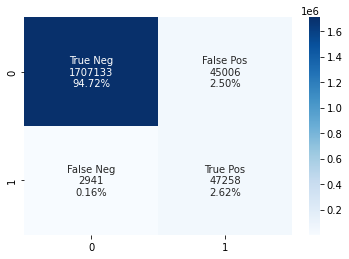

In [ ]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test.argmax(axis=1), new_predictions.argmax(axis=1))
#confusion = confusion_matrix(y_test, new_predictions)
print('Confusion Matrix\n')
print(confusion)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Guardar el Modelo
model.save(path + 'Modelos/MejorModeloD1.h5')

## Multi pruebas

In [ ]:
def red_neuronal_dos_salidas(df, optimizador, f_perdida, capas, epocas, tamano):
    #Particion de datos de entrenamiento y prueba
    Train = df[(df['Mes_envio']<0.5)]
    X_train = Train.drop('RESPONDIDA', axis=1).to_numpy()
    y_train = Train["RESPONDIDA"].to_numpy()
    Test = df[(df['Mes_envio']>=0.5)]
    X_test = Test.drop('RESPONDIDA', axis=1).to_numpy()
    y_test = Test["RESPONDIDA"].to_numpy()
    y_test = np_utils.to_categorical(y_test)
    y_train = np_utils.to_categorical(y_train)
    #Arquitectura del modelo
    model = Sequential()
    model.add(Dense(10, input_dim = 10, activation='relu'))
    for neuronas, funcion_activacion in capas:
      model.add(Dense(neuronas, activation = funcion_activacion))
    model.add(Dense(2, activation = 'softmax', kernel_initializer='normal'))
    model.compile(loss=f_perdida, optimizer=optimizador, metrics=['binary_accuracy'])
    # Ajuste del modelo
    callEar = EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=1)
    model.fit(X_train, y_train, epochs = epocas, batch_size = tamano, callbacks=[callEar], verbose = 1)
    scores = model.evaluate(X_test, y_test)
    precision = scores[1]
    perdida = scores[0]
    return precision, perdida, model

def red_neuronal_una_salida(df, optimizador, f_perdida, capas, epocas, tamano):
    #Particion de datos de entrenamiento y prueba
    Train = df[(df['Mes_envio']<0.5)]
    X_train = Train.drop('RESPONDIDA', axis=1).to_numpy()
    y_train = Train["RESPONDIDA"].to_numpy()
    Test = df[(df['Mes_envio']>=0.5)]
    X_test = Test.drop('RESPONDIDA', axis=1).to_numpy()
    y_test = Test["RESPONDIDA"].to_numpy()
    #Arquitectura del modelo
    model = Sequential()
    model.add(Dense(10, input_dim = 10, activation='relu'))
    for neuronas, funcion_activacion in capas:
      model.add(Dense(neuronas, activation = funcion_activacion))
    model.add(Dense(1, activation = 'relu', kernel_initializer='normal'))
    model.compile(loss=f_perdida, optimizer=optimizador, metrics=['binary_accuracy'])
    # Ajuste del modelo
    callEar = EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=1)
    model.fit(X_train, y_train, epochs = epocas, batch_size = tamano, callbacks=[callEar], verbose = 1)
    scores = model.evaluate(X_test, y_test)
    precision = scores[1]
    perdida = scores[0]
    return precision, perdida, model

## Resultados redes neuronales por salida



###Una salida

In [ ]:
# Datasets
df = pd.read_csv(path + 'Dataset_de_prueba_oficial_1.csv', sep=';')
df2 = pd.read_csv(path + 'Dataset_de_prueba_oficial_2.csv', sep=';')

# Definiciones Arquitecturas
#activation= 'sigmoid', 'relu', 'softmax', 'tanh'
#loss= 'categorical_crossentropy', 
#Optimizador = 'adams', 'sgd'

#Modificar arreglo
ejecuciones = [
               ['Red9','sgd','categorical_crossentropy',[[30,'relu'],[65,'tanh'],[100, 'sigmoid'], [65,'relu'], [30,'tanh'], [10, 'sigmoid']]],
               ['Red10','adam','categorical_crossentropy',[[25,'relu'],[60,'tanh'],[90, 'sigmoid'], [60,'relu'], [30,'tanh'], [15, 'sigmoid']]],
               ['Red11','Adagrad','categorical_crossentropy',[[30,'sigmoid'],[55,'relu'],[90, 'tanh'], [65,'relu'], [35,'relu'], [10, 'sigmoid']]],
               ['Red12','sgd','categorical_crossentropy',[[25,'sigmoid'],[50,'relu'],[90, 'tanh'], [120,'relu'], [80,'relu'], [50, 'sigmoid'], [20, 'sigmoid']]],
               #['Red13','Adamax','categorical_crossentropy',[[20,'relu'],[50, 'sigmoid'],[25,'relu']]],
               ['Red14','Adamax','categorical_crossentropy',[[25,'elu'],[40, 'sigmoid'],[60,'tanh'], [35,'sigmoid'], [15,'relu']]],
               ['Red15','Adagrad','categorical_crossentropy',[[25,'sigmoid'],[50, 'elu'],[70,'relu'],[100,'tanh'], [65,'relu'], [25, 'sigmoid'], [10, 'elu']]],
               #['Red16','adam','categorical_crossentropy',[[30,'sigmoid'],[55, 'elu'],[75,'relu'],[100,'tanh'], [70,'relu'], [35, 'sigmoid'], [15, 'elu']]],
               #['Red17','sgd','categorical_crossentropy',[[25,'sigmoid'],[50, 'relu'],[75,'elu'],[100,'sigmoid'], [70,'tanh'], [35, 'relu'], [15, 'elu']]],
               #['Red18','adam','categorical_crossentropy',[[20,'elu'],[50, 'relu'],[25,'elu'],[10,'sigmoid']]],
               ['Red19','adam','categorical_crossentropy',[[25,'relu'],[45, 'softmax'],[20,'sigmoid'],[5,'sigmoid']]]
               #['Red20','sgd','categorical_crossentropy',[[20,'softmax'],[50, 'sigmoid'],[25,'tanh'],[10,'relu']]]
               ]
arr = []
for nombre, optimizador, f_perdida, arquitectura in ejecuciones:
    for dataset in range (0, 2):
      for i in range (1, 6):
        # Entrenar la red
        if(dataset == 0):
          precision, perdida, Modelo =  red_neuronal_una_salida(df, optimizador, f_perdida, arquitectura, 1000, 2200) # Modificar funcion
          arr.append([nombre, "Dataset1", i, optimizador, f_perdida, precision, perdida])
        else:
          precision, perdida, Modelo = red_neuronal_una_salida(df2, optimizador, f_perdida, arquitectura, 1000, 1550) # Modificar funcion
          arr.append([nombre, "Dataset2", i, optimizador, f_perdida, precision, perdida])
      if(dataset == 0):
        # Guardar el Modelo
        Modelo.save(path + 'Modelos/'+ nombre + '_D1S1.h5')
      else:
        # Guardar el Modelo
        Modelo.save(path + 'Modelos/'+ nombre + '_D2S1.h5')
# Documentar red)
df_glob = pd.read_excel(path + 'Datos_Red_1_salidas.xlsx')
df_salida = pd.DataFrame(arr,columns = ['Red', 'Dataset', 'Iteracion', 'Optimizador', 'F_Perdida', 'Precision', 'Perdida (loss)'])
df_glob = pd.concat([df_glob, df_salida])
df_glob.to_excel(path + 'Datos_Red_1_salidas.xlsx', index = False)
df_glob

Epoch 1/1000
996/996 [==============================] - 12s 12ms/step - loss: 3.1006e-09 - binary_accuracy: 0.9740
Epoch 2/1000
996/996 [==============================] - 12s 12ms/step - loss: 3.1006e-09 - binary_accuracy: 0.9740
Epoch 3/1000
996/996 [==============================] - 12s 12ms/step - loss: 3.1006e-09 - binary_accuracy: 0.9740
Epoch 4/1000
996/996 [==============================] - 12s 12ms/step - loss: 3.1006e-09 - binary_accuracy: 0.9740
Epoch 5/1000
996/996 [==============================] - 12s 12ms/step - loss: 3.1006e-09 - binary_accuracy: 0.9740
Epoch 6/1000
996/996 [==============================] - 12s 12ms/step - loss: 3.1006e-09 - binary_accuracy: 0.9740
Epoch 00006: early stopping
56324/56324 [==============================] - 81s 1ms/step - loss: 3.3202e-09 - binary_accuracy: 0.9721
Epoch 1/1000
996/996 [==============================] - 13s 12ms/step - loss: nan - binary_accuracy: 0.9740
Epoch 2/1000
996/996 [==============================] - 12s 12ms/step

,Red,Dataset,Iteracion,Optimizador,F_Perdida,Precision,Perdida (loss)
0,Red13,Dataset1,1,Adamax,categorical_crossentropy,0.972148,0.000000e+00
1,Red13,Dataset1,2,Adamax,categorical_crossentropy,0.972148,0.000000e+00
2,Red13,Dataset1,3,Adamax,categorical_crossentropy,0.972148,0.000000e+00
3,Red13,Dataset1,4,Adamax,categorical_crossentropy,0.972148,0.000000e+00
4,Red13,Dataset1,5,Adamax,categorical_crossentropy,0.972148,0.000000e+00
...,...,...,...,...,...,...,...
65,Red19,Dataset2,1,adam,categorical_crossentropy,0.948684,NaN
66,Red19,Dataset2,2,adam,categorical_crossentropy,0.948684,6.117369e-09
67,Red19,Dataset2,3,adam,categorical_crossentropy,0.948684,6.117369e-09
68,Red19,Dataset2,4,adam,categorical_crossentropy,0.948684,6.117369e-09


### Dos salidas

In [ ]:
# Datasets
df = pd.read_csv(path + 'Dataset_de_prueba_oficial_1.csv', sep=';')
df2 = pd.read_csv(path + 'Dataset_de_prueba_oficial_2.csv', sep=';')

# Definiciones Arquitecturas
#activation= 'sigmoid', 'relu', 'softmax', 'tanh'
#loss= 'categorical_crossentropy', 
#Optimizador = 'adams', 'sgd'

#Modificar arreglo
ejecuciones = [
               #['Red9','sgd','categorical_crossentropy',[[30,'relu'],[65,'tanh'],[100, 'sigmoid'], [65,'relu'], [30,'tanh'], [10, 'sigmoid']]]
               #['Red10','adam','categorical_crossentropy',[[25,'relu'],[60,'tanh'],[90, 'sigmoid'], [60,'relu'], [30,'tanh'], [15, 'sigmoid']]],
               ['Red11','Adagrad','categorical_crossentropy',[[30,'sigmoid'],[55,'relu'],[90, 'tanh'], [65,'relu'], [35,'relu'], [10, 'sigmoid']]],
               #['Red12','sgd','categorical_crossentropy',[[25,'sigmoid'],[50,'relu'],[90, 'tanh'], [120,'relu'], [80,'relu'], [50, 'sigmoid'], [20, 'sigmoid']]],
               #['Red13','Adamax','categorical_crossentropy',[[20,'relu'],[50, 'sigmoid'],[25,'relu']]],
               #['Red14','Adamax','categorical_crossentropy',[[25,'elu'],[40, 'sigmoid'],[60,'tanh'], [35,'sigmoid'], [15,'relu']]],
               #['Red15','Adagrad','categorical_crossentropy',[[25,'sigmoid'],[50, 'elu'],[70,'relu'],[100,'tanh'], [65,'relu'], [25, 'sigmoid'], [10, 'elu']]]
               #['Red16','adam','categorical_crossentropy',[[30,'sigmoid'],[55, 'elu'],[75,'relu'],[100,'tanh'], [70,'relu'], [35, 'sigmoid'], [15, 'elu']]],
               #['Red17','sgd','categorical_crossentropy',[[25,'sigmoid'],[50, 'relu'],[75,'elu'],[100,'sigmoid'], [70,'tanh'], [35, 'relu'], [15, 'elu']]],
               #['Red18','adam','categorical_crossentropy',[[20,'elu'],[50, 'relu'],[25,'elu'],[10,'sigmoid']]],
               #['Red19','adam','categorical_crossentropy',[[25,'relu'],[45, 'softmax'],[20,'sigmoid'],[5,'sigmoid']]],
               #['Red20','sgd','categorical_crossentropy',[[20,'softmax'],[50, 'sigmoid'],[25,'tanh'],[10,'relu']]]
               ]
arr = []
for nombre, optimizador, f_perdida, arquitectura in ejecuciones:
  
    for dataset in range (0, 2):
      for i in range (1, 6):
        # Entrenar la red
        if(dataset == 0):
          precision, perdida, Modelo =  red_neuronal_dos_salidas(df, optimizador, f_perdida, arquitectura, 1000, 2200) # Modificar funcion
          arr.append([nombre, "Dataset1", i, optimizador, f_perdida, precision, perdida])
        else:
          precision, perdida, Modelo = red_neuronal_dos_salidas(df2, optimizador, f_perdida, arquitectura, 1000, 1550) # Modificar funcion
          arr.append([nombre, "Dataset2", i, optimizador, f_perdida, precision, perdida])
      if(dataset == 0):
        # Guardar el Modelo
        Modelo.save(path + 'Modelos/'+ nombre + '_D1S2.h5')
      else:
        # Guardar el Modelo
        Modelo.save(path + 'Modelos/'+ nombre + '_D2S2.h5')
# Documentar red)
df_glob = pd.read_excel(path + 'Datos_Red_2_salidas.xlsx')
df_salida = pd.DataFrame(arr,columns = ['Red', 'Dataset', 'Iteracion', 'Optimizador', 'F_Perdida', 'Precision', 'Perdida (loss)'])
df_glob = pd.concat([df_glob, df_salida])
df_glob.to_excel(path + 'Datos_Red_2_salidas.xlsx', index = False)
df_glob

Epoch 1/1000
996/996 [==============================] - 12s 12ms/step - loss: 0.5189 - binary_accuracy: 0.9587
Epoch 2/1000
996/996 [==============================] - 12s 12ms/step - loss: 0.3499 - binary_accuracy: 0.9740
Epoch 3/1000
996/996 [==============================] - 12s 12ms/step - loss: 0.2484 - binary_accuracy: 0.9740
Epoch 4/1000
996/996 [==============================] - 12s 12ms/step - loss: 0.1979 - binary_accuracy: 0.9740
Epoch 5/1000
996/996 [==============================] - 12s 12ms/step - loss: 0.1740 - binary_accuracy: 0.9740
Epoch 6/1000
996/996 [==============================] - 12s 12ms/step - loss: 0.1604 - binary_accuracy: 0.9740
Epoch 7/1000
996/996 [==============================] - 12s 12ms/step - loss: 0.1516 - binary_accuracy: 0.9740
Epoch 8/1000
996/996 [==============================] - 12s 12ms/step - loss: 0.1455 - binary_accuracy: 0.9740
Epoch 9/1000
996/996 [==============================] - 12s 12ms/step - loss: 0.1410 - binary_accuracy: 0.9740
E

### Resultados de redes neuronales 1 y 2 salidas

In [ ]:
# Datasets
df = pd.read_csv(path + 'Dataset_de_prueba_oficial_1.csv', sep=';')
df2 = pd.read_csv(path + 'Dataset_de_prueba_oficial_2.csv', sep=';')

# Definiciones Arquitecturas
#activation= 'sigmoid', 'relu', 'softmax', 'tanh'
#loss= 'categorical_crossentropy', 
#Optimizador = 'adams', 'sgd', 'Adagrad', 'Adamax'

#Modificar arreglo
ejecuciones = [
               #['Red9','sgd','categorical_crossentropy',[[30,'relu'],[65,'tanh'],[100, 'sigmoid'], [65,'relu'], [30,'tanh'], [10, 'sigmoid']]]
               #['Red10','adam','categorical_crossentropy',[[25,'relu'],[60,'tanh'],[90, 'sigmoid'], [60,'relu'], [30,'tanh'], [15, 'sigmoid']]],
               #['Red11','Adagrad','categorical_crossentropy',[[30,'sigmoid'],[55,'relu'],[90, 'tanh'], [65,'relu'], [35,'relu'], [10, 'sigmoid']]],
               #['Red12','sgd','categorical_crossentropy',[[25,'sigmoid'],[50,'relu'],[90, 'tanh'], [120,'relu'], [80,'relu'], [50, 'sigmoid'], [20, 'sigmoid']]],
               #['Red13','Adamax','categorical_crossentropy',[[20,'relu'],[50, 'sigmoid'],[25,'relu']]],
               #['Red14','Adamax','categorical_crossentropy',[[25,'elu'],[40, 'sigmoid'],[60,'tanh'], [35,'sigmoid'], [15,'relu']]],
               ['Red15','Adagrad','categorical_crossentropy',[[25,'sigmoid'],[50, 'elu'],[70,'relu'],[100,'tanh'], [65,'relu'], [25, 'sigmoid'], [10, 'elu']]]
               #['Red16','adam','categorical_crossentropy',[[30,'sigmoid'],[55, 'elu'],[75,'relu'],[100,'tanh'], [70,'relu'], [35, 'sigmoid'], [15, 'elu']]],
               #['Red17','sgd','categorical_crossentropy',[[25,'sigmoid'],[50, 'relu'],[75,'elu'],[100,'sigmoid'], [70,'tanh'], [35, 'relu'], [15, 'elu']]],
               #['Red18','adam','categorical_crossentropy',[[20,'elu'],[50, 'relu'],[25,'elu'],[10,'sigmoid']]],
               #['Red19','adam','categorical_crossentropy',[[25,'relu'],[45, 'softmax'],[20,'sigmoid'],[5,'sigmoid']]],
               #['Red20','sgd','categorical_crossentropy',[[20,'softmax'],[50, 'sigmoid'],[25,'tanh'],[10,'relu']]]
               ]
arr1 = []
arr2 = []
for nombre, optimizador, f_perdida, arquitectura in ejecuciones:
  redes = pd.read_excel(path + 'Diseño_arquitecturas.xlsx')
  array_capas=[]
  contador = 1
  for capa in arquitectura:
    array_capas.append([nombre, contador, capa[0], capa[1], optimizador])
    contador+=1
  nueva_Arquitectura = pd.DataFrame(array_capas,columns = ['Red', 'Capa_oculta', 'Neuronas', 'Funcion_activacion', 'Optimizador'])
  redes = pd.concat([redes, nueva_Arquitectura])
  redes.to_excel(path + 'Diseño_arquitecturas.xlsx',index = False)
  for salida in range (0, 2):
    for dataset in range (0, 2):
      for i in range (1, 6):
        # Entrenar la red
        if(dataset == 0):
          if(salida==0):
            precision, perdida, Modelo =  red_neuronal_una_salida(df, optimizador, f_perdida, arquitectura, 1000, 2200)
            arr1.append([nombre, "Dataset1", i, optimizador, f_perdida, precision, perdida])
          else:
            precision, perdida, Modelo =  red_neuronal_dos_salidas(df, optimizador, f_perdida, arquitectura, 1000, 2200)
            arr2.append([nombre, "Dataset1", i, optimizador, f_perdida, precision, perdida])
        else:
          if(salida==0):
            precision, perdida, Modelo = red_neuronal_una_salida(df2, optimizador, f_perdida, arquitectura, 1000, 1550)
            arr1.append([nombre, "Dataset2", i, optimizador, f_perdida, precision, perdida])
          else:
            precision, perdida, Modelo =  red_neuronal_dos_salidas(df, optimizador, f_perdida, arquitectura, 1000, 1550)
            arr2.append([nombre, "Dataset2", i, optimizador, f_perdida, precision, perdida])
      # Guardar el Modelo
      if(dataset == 0):
        if(salida == 0):
          Modelo.save(path + 'Modelos/'+ nombre + '_D1S1.h5')
        else:
          Modelo.save(path + 'Modelos/'+ nombre + '_D1S2.h5')
      else:
        if(salida == 0):
          Modelo.save(path + 'Modelos/'+ nombre + '_D2S1.h5')
        else:
          Modelo.save(path + 'Modelos/'+ nombre + '_D2S2.h5')

# Documentar red
df_glob1 = pd.read_excel(path + 'Datos_Red_1_salidas.xlsx')
df_salida1 = pd.DataFrame(arr1, columns = ['Red', 'Dataset', 'Iteracion', 'Optimizador', 'F_Perdida', 'Precision', 'Perdida (loss)'])
df_glob1 = pd.concat([df_glob1, df_salida1])
df_glob1.to_excel(path + 'Datos_Red_1_salidas.xlsx',index = False)

df_glob2 = pd.read_excel(path + 'Datos_Red_2_salidas.xlsx')
df_salida2 = pd.DataFrame(arr2, columns = ['Red', 'Dataset', 'Iteracion', 'Optimizador', 'F_Perdida', 'Precision', 'Perdida (loss)'])
df_glob2 = pd.concat([df_glob2, df_salida2])
df_glob2.to_excel(path + 'Datos_Red_2_salidas.xlsx', index = False)

Ya se generó.
Ya se generó.
Ya se generó.
Ya se generó.
Ya se generó.
Modelo ya generado
Ya se generó.
Ya se generó.
Ya se generó.
Ya se generó.
Ya se generó.
Modelo ya generado
Epoch 1/1000
996/996 [==============================] - 14s 14ms/step - loss: 0.1536 - binary_accuracy: 0.9730
Epoch 2/1000
996/996 [==============================] - 14s 14ms/step - loss: 0.1207 - binary_accuracy: 0.9740
Epoch 3/1000
996/996 [==============================] - 14s 14ms/step - loss: 0.1206 - binary_accuracy: 0.9740
Epoch 4/1000
996/996 [==============================] - 14s 14ms/step - loss: 0.1206 - binary_accuracy: 0.9740
Epoch 5/1000
996/996 [==============================] - 14s 14ms/step - loss: 0.1206 - binary_accuracy: 0.9740
Epoch 6/1000
996/996 [==============================] - 14s 14ms/step - loss: 0.1206 - binary_accuracy: 0.9740
Epoch 7/1000
996/996 [==============================] - 14s 14ms/step - loss: 0.1206 - binary_accuracy: 0.9740
Epoch 8/1000
996/996 [=======================

In [ ]:
#Ordenar
df_glob1 = pd.read_excel(path + 'Datos_Red_1_salidas.xlsx')
df_glob2 = pd.read_excel(path + 'Datos_Red_2_salidas.xlsx')
redes = pd.read_excel(path + 'Diseño_arquitecturas.xlsx')

redes = redes.sort_values(['Red','Capa_oculta']).reset_index(drop = True)
df_glob1 = df_glob1.sort_values(['Red', 'Dataset', 'Iteracion']).reset_index(drop = True)
df_glob2 = df_glob2.sort_values(['Red', 'Dataset', 'Iteracion']).reset_index(drop = True)

redes.to_excel(path + 'Diseño_arquitecturas.xlsx',index = False)
df_glob1.to_excel(path + 'Datos_Red_1_salidas.xlsx',index = False)
df_glob2.to_excel(path + 'Datos_Red_2_salidas.xlsx',index = False)

##Cargar modelo existente

In [ ]:
# Recrea exactamente el mismo modelo solo desde el archivo
model = keras.models.load_model(path + '/Modelos/Red19_D2S2.h5')

## Evaluación de precisión del modelo individual

###Dataset 1

In [ ]:
# Split the data into a training set and a test set
Train1 = df[(df['Mes_envio']<0.5)]
X_train1 = Train1.drop('RESPONDIDA', axis=1).to_numpy()
y_train1 = Train1["RESPONDIDA"].to_numpy()

Test1 = df[(df['Mes_envio']>=0.5)]
X_test1 = Test1.drop('RESPONDIDA', axis=1).to_numpy()
y_test1 = Test1["RESPONDIDA"].to_numpy()


In [ ]:
# Aplicar solo si es de dos salidas
y_test1 = np_utils.to_categorical(y_test1)
y_train1 = np_utils.to_categorical(y_train1)

In [ ]:
scores = model.evaluate(X_test1, y_test1)
precision = scores[1]
perdida = scores[0]
print("Precision: ", precision)
print("Perdida: ", perdida)

56324/56324 [==============================] - 67s 1ms/step - loss: 0.1272 - binary_accuracy: 0.9721
Precision:  0.9721478223800659
Perdida:  0.12717977166175842


###Dataset 2

In [ ]:
# Split the data into a training set and a test set
Train2 = df2[(df2['Mes_envio']<0.5)]
X_train2 = Train2.drop('RESPONDIDA', axis=1).to_numpy()
y_train2 = Train2["RESPONDIDA"].to_numpy()

Test2 = df2[(df2['Mes_envio']>=0.5)]
X_test2 = Test2.drop('RESPONDIDA', axis=1).to_numpy()
y_test2 = Test2["RESPONDIDA"].to_numpy()

In [ ]:
# Aplicar solo si es de dos salidas
y_test2 = np_utils.to_categorical(y_test2)
y_train2 = np_utils.to_categorical(y_train2)

In [ ]:
scores = model.evaluate(X_test2, y_test2)
precision = scores[1]
perdida = scores[0]
print("Precision: ", precision)
print("Perdida: ", perdida)

30570/30570 [==============================] - 36s 1ms/step - loss: 0.0646 - binary_accuracy: 0.9632
Precision:  0.9632233381271362
Perdida:  0.06461578607559204


##Validación de Modelo, Matriz de Confusión

In [30]:
# Recrea exactamente el mismo modelo solo desde el archivo
mejor_modelo = keras.models.load_model(path + '/Mejores_modelos/Red36_D2S2.h5')

In [31]:
#Dataset N°1
X = df.drop('RESPONDIDA', axis=1).to_numpy()
Y = df["RESPONDIDA"].to_numpy()
Y = np_utils.to_categorical(Y)

In [28]:
#Dataset N°2
X = df2.drop('RESPONDIDA', axis=1).to_numpy()
Y = df2["RESPONDIDA"].to_numpy()
Y = np_utils.to_categorical(Y)

Confusion Matrix

[[3856544   28000]
 [  41783   65360]]


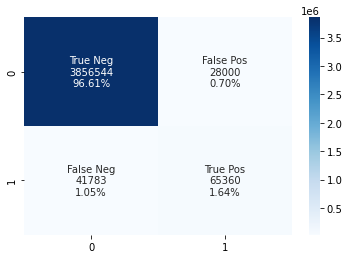

In [32]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
new_predictions = mejor_modelo.predict(X)
confusion = confusion_matrix(Y.argmax(axis=1), new_predictions.argmax(axis=1))
#confusion = confusion_matrix(y_test, new_predictions)
print('Confusion Matrix\n')
print(confusion)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')

In [20]:
np.sum(confusion[:,1], axis=0)

123633